In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import textacy.resources
# rs = textacy.resources.ConceptNet()
# rs.download()
# rs.info

In [2]:
rs = textacy.resources.DepecheMood(lang="en", word_rep="lemmapos")
# rs.download()
# rs.info

In [3]:
import pandas as pd
data = pd.read_csv('C:/Users/zhou/Desktop/BIA 660/000--Project/3 - final/transcripts.csv')

In [4]:
transcript = list(data['transcript'])
# transcript[6]

## 1 get emo from the 1st transcript (as whole)

In [5]:
# emotion of the 1st transcript --- as whole

text = transcript[0]
doc = textacy.make_spacy_doc(text, lang="en_core_web_sm")
emo_dict = rs.get_emotional_valence(doc)
emo_dict
# emo_list = [emo_dict.get('AFRAID'), emo_dict.get('AMUSED'), emo_dict.get('ANGRY'), emo_dict.get('ANNOYED'),\
#            emo_dict.get('DONT_CARE'), emo_dict.get('HAPPY'), emo_dict.get('INSPIRED'), emo_dict.get('SAD')]
# emo_list
# emo_dict['AFRAID']

{'AFRAID': 0.09279423035083662,
 'AMUSED': 0.1141766045048574,
 'ANGRY': 0.11647180487773583,
 'ANNOYED': 0.13236452874016583,
 'DONT_CARE': 0.12996320081026425,
 'HAPPY': 0.1058393715773011,
 'INSPIRED': 0.20124741636154367,
 'SAD': 0.1071428427772953}

## 2 seperate a transcript into 10 parts, get emo for each part 

In [6]:
# split the 1st transcript into 10 parts, get emotion for each part
text = transcript[222]

df = pd.DataFrame( columns = ['AFRAID', 'AMUSED', 'ANGRY', 'ANNOYED',\
                            'DONT_CARE', 'HAPPY', 'INSPIRED', 'SAD'])  
for i in range(1,11,1):
    content = text[:len(text)//10*i]
    doc = textacy.make_spacy_doc(content, lang="en_core_web_sm")
    emo = rs.get_emotional_valence(doc)
    df = df.append(emo, ignore_index=True)


df

,AFRAID,AMUSED,ANGRY,ANNOYED,DONT_CARE,HAPPY,INSPIRED,SAD
0,0.075566,0.135889,0.095331,0.129084,0.139532,0.115648,0.222608,0.086341
1,0.077875,0.137817,0.095478,0.126858,0.137649,0.113718,0.222105,0.088500
2,0.082220,0.135714,0.099171,0.127851,0.134462,0.111195,0.217414,0.091974
3,0.083231,0.132471,0.102212,0.128334,0.135248,0.109967,0.214372,0.094165
4,0.083404,0.131046,0.105412,0.130116,0.136868,0.107690,0.210607,0.094857
5,0.083171,0.130289,0.105233,0.130255,0.136160,0.107988,0.211690,0.095214
6,0.084010,0.131022,0.105903,0.130236,0.136125,0.107720,0.208754,0.096229
7,0.084682,0.131343,0.104881,0.129551,0.135779,0.108547,0.208892,0.096324
8,0.084920,0.130651,0.104893,0.129297,0.135574,0.109097,0.208673,0.096895
9,0.085372,0.130456,0.104912,0.129896,0.135927,0.108866,0.208070,0.096500


Text(0, 0.5, 'sentiment score for each emotion')

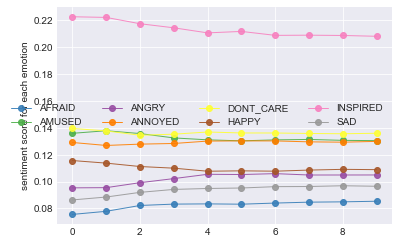

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
num=0
for column in df:
    num+=1
    plt.plot(df[column], marker='o', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.ylabel('sentiment score for each emotion') 

plt.legend(loc=0, ncol=4)

## 3 get emo from 1st transcript sentence by sentence

In [12]:
import nltk

afraid, amused, angry, annoyed, dont_care, happy, inspired, sad = [],[],[],[],[],[],[],[]

sentences = nltk.sent_tokenize(transcript[1234])
len(sentences)
for i in sentences:
    doc = textacy.make_spacy_doc(i, lang="en_core_web_sm")
    emo = rs.get_emotional_valence(doc)#['AFRAID']
    if emo!={}:
        afraid.append(emo['AFRAID'])
        amused.append(emo['AMUSED'])
        angry.append(emo['ANGRY'])
        annoyed.append(emo['ANNOYED'])
        dont_care.append(emo['DONT_CARE'])
        happy.append(emo['HAPPY'])
        inspired.append(emo['INSPIRED'])
        sad.append(emo['SAD'])

    
# afraid    

96

Text(0.5, 0, 'sentences')

Text(0, 0.5, 'emotion scores')

Text(0.5, 1.0, 'sentiment detection by sentences')

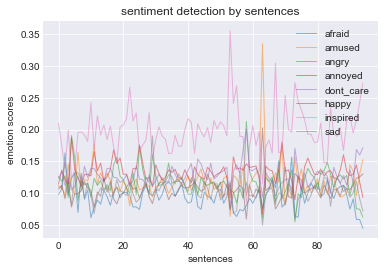

In [13]:
plt.plot(range(len(afraid)), afraid, label = "afraid", lw=1, alpha=0.5) 
plt.plot(range(len(amused)), amused, label = "amused", lw=1, alpha=0.5) 
plt.plot(range(len(angry)), angry, label = "angry", lw=1, alpha=0.5) 
plt.plot(range(len(annoyed)), annoyed, label = "annoyed", lw=1, alpha=0.5) 
plt.plot(range(len(dont_care)), dont_care, label = "dont_care", lw=1, alpha=0.5) 
plt.plot(range(len(happy)), happy, label = "happy", lw=1, alpha=0.5) 
plt.plot(range(len(inspired)), inspired, label = "inspired", lw=1, alpha=0.5) 
plt.plot(range(len(sad)), sad, label = "sad", lw=1, alpha=0.5) 
  

plt.xlabel('sentences') 
plt.ylabel('emotion scores') 
plt.title('sentiment detection by sentences') 
  
plt.legend() 
plt.show() 

In [30]:
import nltk

afraid, amused, angry, annoyed, dont_care, happy, inspired, sad = [],[],[],[],[],[],[],[]

sentences = nltk.sent_tokenize(transcript[1234])
alpha = 0.8 # smoothing factor for exponential smoothing
len(sentences)
for i in sentences:
    doc = textacy.make_spacy_doc(i, lang="en_core_web_sm")
    emo = rs.get_emotional_valence(doc)#['AFRAID']
    if emo!={}:
        afraid.append(emo['AFRAID'])
        afraid_smoo = [alpha*i+(1-alpha)*(afraid[afraid.index(i)-1]) for i in afraid]  #if (afraid.index(i)-1)>=0
        amused.append(emo['AMUSED'])
        amused_smoo = [alpha*i+(1-alpha)*(amused[amused.index(i)-1]) for i in amused]  
        angry.append(emo['ANGRY'])
        angry_smoo = [alpha*i+(1-alpha)*(angry[angry.index(i)-1]) for i in angry]  
        annoyed.append(emo['ANNOYED'])
        annoyed_smoo = [alpha*i+(1-alpha)*(annoyed[annoyed.index(i)-1]) for i in annoyed]  
        dont_care.append(emo['DONT_CARE'])
        dont_care_smoo = [alpha*i+(1-alpha)*(dont_care[dont_care.index(i)-1]) for i in dont_care]  
        happy.append(emo['HAPPY'])
        happy_smoo = [alpha*i+(1-alpha)*(happy[happy.index(i)-1]) for i in happy]  
        inspired.append(emo['INSPIRED'])
        inspired_smoo = [alpha*i+(1-alpha)*(inspired[inspired.index(i)-1]) for i in inspired]  
        sad.append(emo['SAD'])
        sad_smoo = [alpha*i+(1-alpha)*(sad[sad.index(i)-1]) for i in sad]  

# amused

96

Text(0.5, 0, 'sentences')

Text(0, 0.5, 'emotion scores')

Text(0.5, 1.0, 'sentiment detection by sentences')

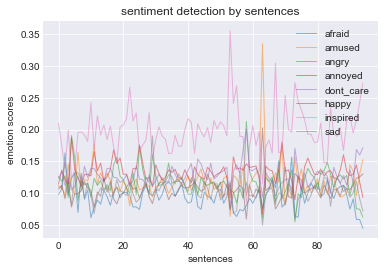

In [18]:
plt.plot(range(len(afraid)), afraid, label = "afraid", lw=1, alpha=0.5) 
plt.plot(range(len(amused)), amused, label = "amused", lw=1, alpha=0.5) 
plt.plot(range(len(angry)), angry, label = "angry", lw=1, alpha=0.5) 
plt.plot(range(len(annoyed)), annoyed, label = "annoyed", lw=1, alpha=0.5) 
plt.plot(range(len(dont_care)), dont_care, label = "dont_care", lw=1, alpha=0.5) 
plt.plot(range(len(happy)), happy, label = "happy", lw=1, alpha=0.5) 
plt.plot(range(len(inspired)), inspired, label = "inspired", lw=1, alpha=0.5) 
plt.plot(range(len(sad)), sad, label = "sad", lw=1, alpha=0.5) 
  

plt.xlabel('sentences') 
plt.ylabel('emotion scores') 
plt.title('sentiment detection by sentences') 
  
plt.legend() 
plt.show() 

Text(0.5, 0, 'sentences')

Text(0, 0.5, 'emotion scores')

Text(0.5, 1.0, 'sentiment detection by sentences')

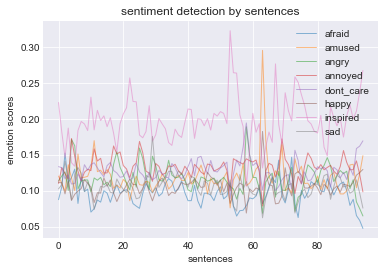

In [31]:
plt.plot(range(len(afraid_smoo)), afraid_smoo, label = "afraid", lw=1, alpha=0.5) 
plt.plot(range(len(amused_smoo)), amused_smoo, label = "amused", lw=1, alpha=0.5) 
plt.plot(range(len(angry_smoo)), angry_smoo, label = "angry", lw=1, alpha=0.5) 
plt.plot(range(len(annoyed_smoo)), annoyed_smoo, label = "annoyed", lw=1, alpha=0.5) 
plt.plot(range(len(dont_care_smoo)), dont_care_smoo, label = "dont_care", lw=1, alpha=0.5) 
plt.plot(range(len(happy_smoo)), happy_smoo, label = "happy", lw=1, alpha=0.5) 
plt.plot(range(len(inspired_smoo)), inspired_smoo, label = "inspired", lw=1, alpha=0.5) 
plt.plot(range(len(sad_smoo)), sad_smoo, label = "sad", lw=1, alpha=0.5) 
  

plt.xlabel('sentences') 
plt.ylabel('emotion scores') 
plt.title('sentiment detection by sentences') 
  
plt.legend() 
plt.show() 